# Advance House Prediction

## Steps we have to follow:
1) data analysis

2) Feature Engineering

3) EDA(Its also a part of feature engineering)

4) Feature Selection

5) Model Building

6) Deployment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 999)
%matplotlib inline
import warnings
warnings.simplefilter(action = "ignore")

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.shape

(1460, 81)

In [6]:
#almost 81 columns are there.
#first we need to see the nan values there or not

In [7]:
null_lst = []
null_percen = []
null_count = []
for i in df.columns:
    count = 0
    if df[i].isnull().sum()>=1:
        null_lst.append(i)
        count = df[i].isnull().sum()
        null_count.append(count)
        percentage = (count/len(df))*100
        null_percen.append(percentage)

In [8]:
null_dict = {"null_lst" : null_lst, "null_percentage" : null_percen, "null_count" : null_count}
null_df = pd.DataFrame.from_dict(null_dict)

In [9]:
null_df

,null_lst,null_percentage,null_count
0,LotFrontage,17.739726,259
1,Alley,93.767123,1369
2,MasVnrType,0.547945,8
3,MasVnrArea,0.547945,8
4,BsmtQual,2.534247,37
5,BsmtCond,2.534247,37
6,BsmtExposure,2.602740,38
7,BsmtFinType1,2.534247,37
8,BsmtFinType2,2.602740,38
9,Electrical,0.068493,1


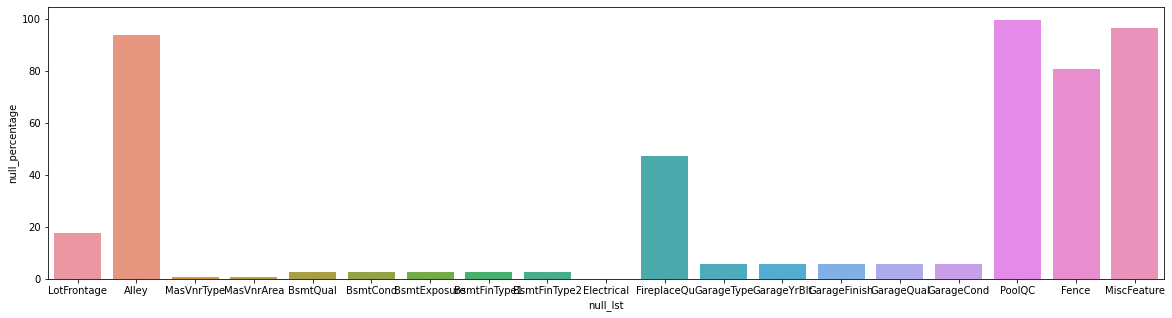

In [10]:
fig = plt.figure(figsize = (20,5))
sns.barplot(x = "null_lst", y = "null_percentage", data = null_df)

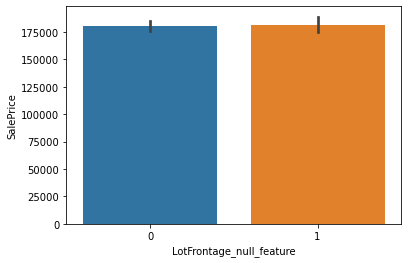

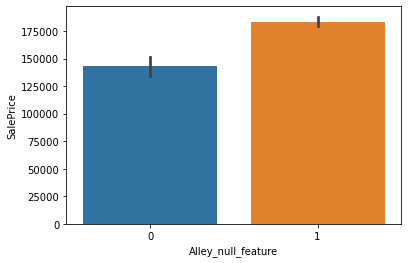

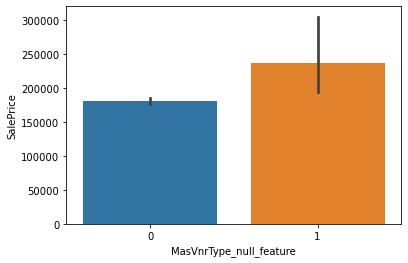

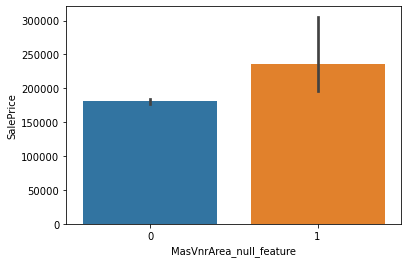

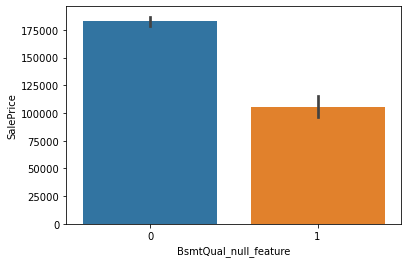

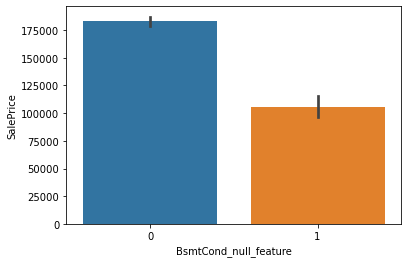

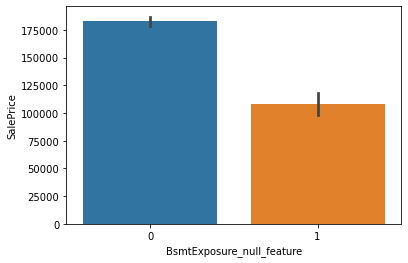

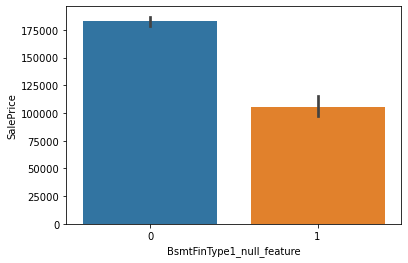

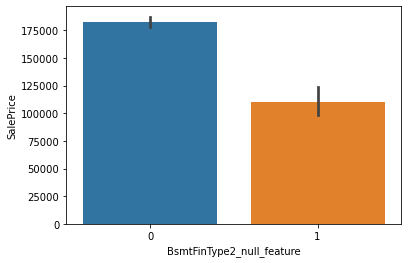

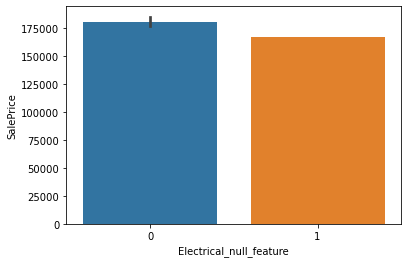

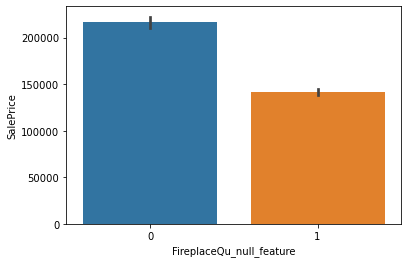

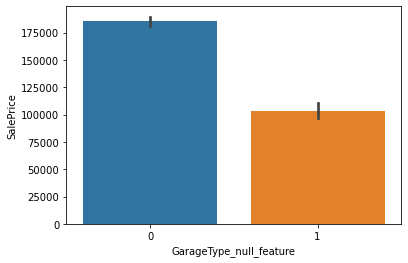

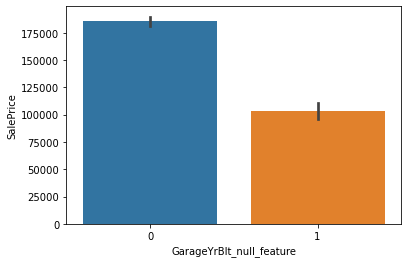

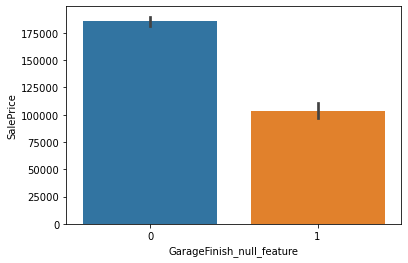

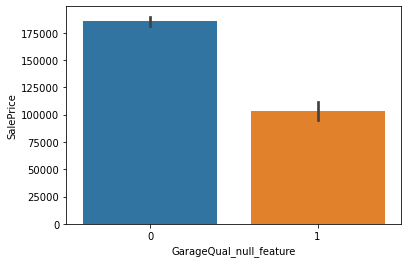

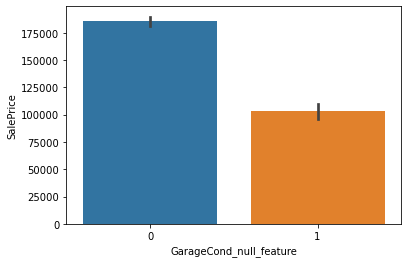

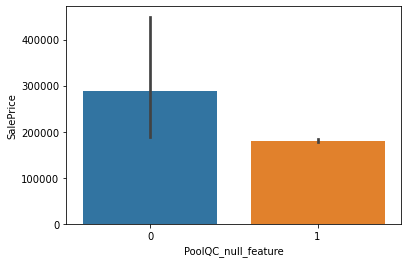

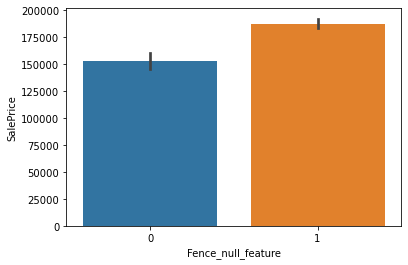

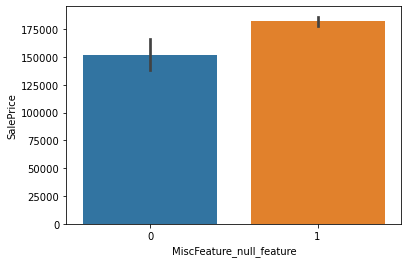

In [11]:
#Need to see the plot based on null values:
for i in null_lst:
    fig = plt.figure()
    df[i + '_null_feature'] = np.where(df[i].isnull(), 1, 0)
    sns.barplot(x = df[i + '_null_feature'], y = df['SalePrice'], data = df)
    df.drop(columns = [i + "_null_feature"], inplace = True)
    plt.show()

In [12]:
#split the cata(nominal and ordinal based on the description) and num variables
categorical_features = df.select_dtypes(include = "object")
numerical_features = df.select_dtypes(exclude = "object")

ordinal_categorical_features = df[['MSZoning', 'LotShape', 'LandSlope', 'HouseStyle', 'BldgType', 'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageFinish', 'GarageCond', 'PoolQC']].columns
nominal_categorical_features = []
for i in categorical_features:
    if i not in ordinal_categorical_features:
        nominal_categorical_features.append(i)

In [13]:
print(categorical_features.shape)
len(ordinal_categorical_features) + len(nominal_categorical_features)

(1460, 43)


43

In [14]:
null_cata = []
null_nom_cata = []
null_ord_cata = []
null_num = []
for i in null_lst:
    if i in categorical_features:
        null_cata.append(i)
        if i in nominal_categorical_features:
            null_nom_cata.append(i)
        elif i in ordinal_categorical_features:
            null_ord_cata.append(i)
    elif i in numerical_features:
        null_num.append(i)

In [15]:
for i in null_ord_cata:
    print(i, null_df[null_df["null_lst"] == i])

BsmtQual    null_lst  null_percentage  null_count
4  BsmtQual         2.534247          37
BsmtCond    null_lst  null_percentage  null_count
5  BsmtCond         2.534247          37
BsmtExposure        null_lst  null_percentage  null_count
6  BsmtExposure          2.60274          38
BsmtFinType1        null_lst  null_percentage  null_count
7  BsmtFinType1         2.534247          37
BsmtFinType2        null_lst  null_percentage  null_count
8  BsmtFinType2          2.60274          38
FireplaceQu        null_lst  null_percentage  null_count
10  FireplaceQu        47.260274         690
GarageFinish         null_lst  null_percentage  null_count
13  GarageFinish         5.547945          81
GarageQual       null_lst  null_percentage  null_count
14  GarageQual         5.547945          81
GarageCond       null_lst  null_percentage  null_count
15  GarageCond         5.547945          81
PoolQC    null_lst  null_percentage  null_count
16   PoolQC        99.520548        1453


#### incase of ordinal cata having null values. we need to consider that by not removing.


In [16]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [17]:
#perform label encoding on the cata's
Qual_dict = {np.nan : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4}
cond_dict = {np.nan : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, 'Ex' : 5}
Exposure_dict = {np.nan : 0, "No" : 1, "Mn" : 2, "Av" : 3, "Gd" : 4}
Fintype_dict = {np.nan : 0, "Unf" : 1, "LwQ" : 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}
Fire_dict = {np.nan : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}
Garage_dict = {np.nan : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3}

In [18]:
df['BsmtQual'] = df['BsmtQual'].map(Qual_dict)
df['BsmtCond'] = df['BsmtCond'].map(cond_dict)
df['GarageQual'] = df['GarageQual'].map(cond_dict)
df['GarageCond'] = df['GarageCond'].map(cond_dict)
df['PoolQC'] = df['PoolQC'].map(Qual_dict)

df['BsmtExposure'] = df['BsmtExposure'].map(Exposure_dict)

df['BsmtFinType1'] = df['BsmtFinType1'].map(Fintype_dict)

df['BsmtFinType2'] = df['BsmtFinType2'].map(Fintype_dict)

df['FireplaceQu'] = df["FireplaceQu"].map(Fire_dict)

df['GarageFinish'] = df["GarageFinish"].map(Garage_dict)



In [19]:
for i in null_ord_cata:
    print(df[i].isnull().sum())

0
0
0
0
0
0
0
0
0
0


In [20]:
#now need to work on nomical categories:

In [21]:
for i in null_nom_cata:
    print(i, null_df[null_df["null_lst"] == i])

Alley   null_lst  null_percentage  null_count
1    Alley        93.767123        1369
MasVnrType      null_lst  null_percentage  null_count
2  MasVnrType         0.547945           8
Electrical      null_lst  null_percentage  null_count
9  Electrical         0.068493           1
GarageType       null_lst  null_percentage  null_count
11  GarageType         5.547945          81
Fence    null_lst  null_percentage  null_count
17    Fence        80.753425        1179
MiscFeature        null_lst  null_percentage  null_count
18  MiscFeature         96.30137        1406


In [22]:
#replace than all nan's with another category:
for i in null_nom_cata:
    df[i] = df[i].fillna("missed")

In [23]:
for i in null_cata:
    val = df[i].isnull().sum()
    if val > 0 :
        print("Still i am null!!")
    elif val == 0:
        print(i , "I am fine!")

Alley I am fine!
MasVnrType I am fine!
BsmtQual I am fine!
BsmtCond I am fine!
BsmtExposure I am fine!
BsmtFinType1 I am fine!
BsmtFinType2 I am fine!
Electrical I am fine!
FireplaceQu I am fine!
GarageType I am fine!
GarageFinish I am fine!
GarageQual I am fine!
GarageCond I am fine!
PoolQC I am fine!
Fence I am fine!
MiscFeature I am fine!


Now all null values are cleared for cata's and go for num's

In [24]:
for i in null_num:
    print(i, null_df[null_df["null_lst"] == i])

LotFrontage       null_lst  null_percentage  null_count
0  LotFrontage        17.739726         259
MasVnrArea      null_lst  null_percentage  null_count
3  MasVnrArea         0.547945           8
GarageYrBlt        null_lst  null_percentage  null_count
12  GarageYrBlt         5.547945          81


In [25]:
#fill all na's in num with median except lotfrontage and fill that with random values
def random_val_for_cata(df,var):
    random_sample = df[var].dropna().sample(df[i].isnull().sum(), random_state = 0)
    random_sample.index = df[df[var].isnull()].index
    df.loc[df[var].isnull(), var] = random_sample
for i in null_num:
    if i == "LotFrontage":
        #function is taken for fillin random values.
        random_val_for_cata(df,i)
    else:
        df[i] = df[i].fillna(np.median(df[i]))

In [26]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i, df[i].isnull().sum())

MasVnrArea 8
GarageYrBlt 81


In [27]:
#df['GarageYrBlt'] #year is having null value's 
#replace this with highest value
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].value_counts().index.max())
df['MasVnrArea'] = df['MasVnrArea'].fillna(int(df['MasVnrArea'].mean()))

In [28]:
#Now all na's are removed.

Next step is to go for encoding for catalabels

In [29]:
for i in categorical_features:
    print(i, df[i].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
Alley ['missed' 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'Met

first we need to focus on ordinal categorical features

In [30]:
for i in ordinal_categorical_features:
    print(i, df[i].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandSlope ['Gtl' 'Mod' 'Sev']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
ExterQual ['Gd' 'TA' 'Ex' 'Fa']
ExterCond ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual [3 2 4 0 1]
BsmtCond [3 4 0 2 1]
BsmtExposure [1 4 2 3 0]
BsmtFinType1 [6 5 1 3 4 0 2]
BsmtFinType2 [1 4 0 5 3 2 6]
HeatingQC ['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual ['Gd' 'TA' 'Ex' 'Fa']
FireplaceQu [0 3 4 2 5 1]
GarageQual [3 2 4 0 5 1]
GarageFinish [2 1 3 0]
GarageCond [3 2 0 4 1 5]
PoolQC [0 4 1 3]


In [31]:
mszone_dict = {"C (all)" : 1, "FV" : 2, "RL" : 3,'RM' : 4, 'RH' : 5}
lotshape_dict = {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4}
landslope_dict = {"Gtl" : 1, "Mod" : 2, "Sev" : 3}
house_dict = {"1Story" : 1, "1.5Fin" : 2, "1.5Unf" : 3, "2Story" : 4, "2.5Fin" : 5, "2.5Unf" : 6, "SFoyer" : 7, "SLvl" : 8}
blgd_dict = {"1Fam" : 1, "2fmCon" : 2, "Duplex" : 3, "TwnhsE": 4, "Twnhs" : 5}
qual_dict = {"Po":1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex": 5}

In [32]:
def label_encoding(df,var, dic):
    df[var] = df[var].map(dic)

In [33]:
label_encoding(df,"MSZoning", mszone_dict)
label_encoding(df,"LotShape", lotshape_dict)
label_encoding(df,"LandSlope", landslope_dict)
label_encoding(df,"HouseStyle", house_dict)

label_encoding(df,"BldgType", blgd_dict)
label_encoding(df,"ExterQual",qual_dict)
label_encoding(df,"ExterCond",qual_dict)
label_encoding(df,"HeatingQC",qual_dict)
label_encoding(df,"KitchenQual",qual_dict)

In [34]:
for i in ordinal_categorical_features:
    print(i, df[i].unique())

MSZoning [3 4 1 2 5]
LotShape [4 3 2 1]
LandSlope [1 2 3]
HouseStyle [4 1 2 3 7 8 6 5]
BldgType [1 2 3 4 5]
ExterQual [4 3 5 2]
ExterCond [3 4 2 1 5]
BsmtQual [3 2 4 0 1]
BsmtCond [3 4 0 2 1]
BsmtExposure [1 4 2 3 0]
BsmtFinType1 [6 5 1 3 4 0 2]
BsmtFinType2 [1 4 0 5 3 2 6]
HeatingQC [5 4 3 2 1]
KitchenQual [4 3 5 2]
FireplaceQu [0 3 4 2 5 1]
GarageQual [3 2 4 0 5 1]
GarageFinish [2 1 3 0]
GarageCond [3 2 0 4 1 5]
PoolQC [0 4 1 3]


Now work on nominal categorial variables

In [35]:
less_norm_catas = []
for i in nominal_categorical_features:
    if df[i].nunique()<4:
        less_norm_catas.append(i)
print(less_norm_catas)

['Street', 'Alley', 'Utilities', 'CentralAir', 'PavedDrive']


In [36]:
#for less cata's, we create dummy's
Street = pd.get_dummies(df['Street'], drop_first = True)
Alley = pd.get_dummies(df['Alley'], drop_first = True)
Street = pd.get_dummies(df['Street'], drop_first = True)
Utilities = pd.get_dummies(df['Utilities'], drop_first = True)
CentralAir = pd.get_dummies(df['CentralAir'], drop_first = True)
PavedDrive = pd.get_dummies(df['PavedDrive'], drop_first = True)

In [37]:
df = pd.concat([df,Street, Alley, Utilities, CentralAir, PavedDrive], axis=1)

In [38]:
df.drop(columns = less_norm_catas , inplace = True)

In [39]:
#now work on cata's having more number of categories
more_norm_cata = []
for i in categorical_features:
    if i not in less_norm_catas:
            more_norm_cata.append(i)

In [40]:
more_norm_cata

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [41]:
#replace the cate with their mean based on the saleprice.
for i in more_norm_cata:
    dic = (df.groupby([i])['SalePrice'].mean()/len(df)).to_dict()
    df[i] = df[i].map(dic)

In [42]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pave,Pave,missed,NoSeWa,Y,P,Y
0,1,60,130.825339,65.0,8450,112.845766,123.413525,121.190444,123.258082,135.592995,126.366775,124.088634,127.235485,143.871071,7,5,2003,2003,117.454765,123.153205,146.392398,146.871548,140.199912,196.0,158.653089,126.051299,154.267426,138.827725,125.775768,113.460477,161.242274,706,126.503213,0,150,856,124.672052,147.201664,127.962406,856,854,0,1710,1,0,2,1,3,1,145.284948,8,125.636402,0,96.802385,138.967573,2003.0,138.403335,2,548,128.417696,128.68886,0,61,0,0,0,0,123.564838,128.490985,124.689322,0,2,2008,118.768381,120.001520,208500,1,0,1,0,1,0,1
1,2,20,130.825339,80.0,9600,112.845766,123.413525,121.872996,123.258082,163.542964,97.585946,124.088634,127.235485,120.537999,6,8,1976,1976,117.454765,123.153205,102.343957,102.604913,107.001295,0.0,98.863913,126.051299,102.606654,138.827725,125.775768,176.499867,110.666485,978,126.503213,0,284,1262,124.672052,147.201664,127.962406,1262,0,0,1262,0,1,2,0,3,1,95.864734,6,125.636402,1,140.906499,138.967573,1976.0,138.403335,2,460,128.417696,128.68886,298,0,0,0,0,0,123.564838,128.490985,124.689322,0,5,2007,118.768381,120.001520,181500,1,0,1,0,1,0,1
2,3,60,130.825339,68.0,11250,141.165524,123.413525,121.190444,123.258082,135.592995,126.366775,124.088634,127.235485,143.871071,7,5,2001,2002,117.454765,123.153205,146.392398,146.871548,140.199912,162.0,158.653089,126.051299,154.267426,138.827725,125.775768,132.047711,161.242274,486,126.503213,0,434,920,124.672052,147.201664,127.962406,920,866,0,1786,1,0,2,1,3,1,145.284948,6,125.636402,1,140.906499,138.967573,2001.0,138.403335,2,608,128.417696,128.68886,0,42,0,0,0,0,123.564838,128.490985,124.689322,0,9,2008,118.768381,120.001520,223500,1,0,1,0,1,0,1
3,4,70,130.825339,60.0,9550,141.165524,123.413525,124.399607,123.258082,144.263511,126.366775,124.088634,127.235485,143.871071,7,5,1915,1970,117.454765,123.153205,102.631264,110.499279,107.001295,0.0,98.863913,126.051299,90.610326,96.410834,146.301307,113.460477,110.666485,216,126.503213,0,540,756,124.672052,107.437583,127.962406,961,756,0,1717,1,0,1,0,3,1,145.284948,7,125.636402,1,155.035216,91.843262,1998.0,97.367413,3,642,128.417696,128.68886,0,35,272,0,0,0,123.564838,128.490985,124.689322,0,2,2006,118.768381,100.360701,140000,1,0,1,0,1,0,1
4,5,60,130.825339,84.0,14260,141.165524,123.413525,121.872996,123.258082,229.654327,126.366775,124.088634,127.235485,143.871071,8,5,2000,2000,117.454765,123.153205,146.392398,146.871548,140.199912,350.0,158.653089,126.051299,154.267426,138.827725,125.775768,141.536590,161.242274,655,126.503213,0,490,1145,124.672052,147.201664,127.962406,1145,1053,0,2198,1,0,2,1,4,1,145.284948,9,125.636402,1,140.906499,138.967573,2000.0,138.403335,3,836,128.417696,128.68886,192,84,0,0,0,0,123.564838,128.490985,124.689322,0,12,2008,118.768381,120.001520,250000,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,130.825339,62.0,7917,112.845766,123.4

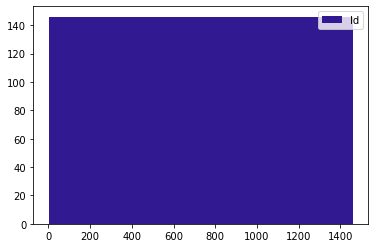

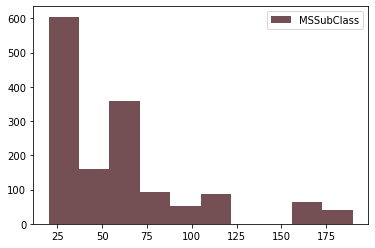

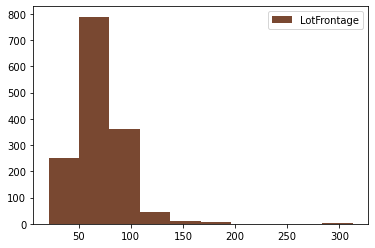

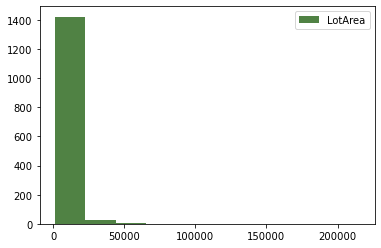

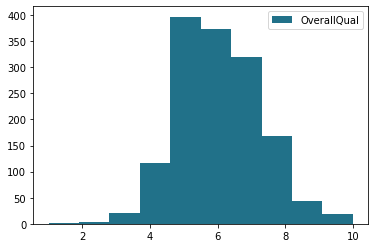

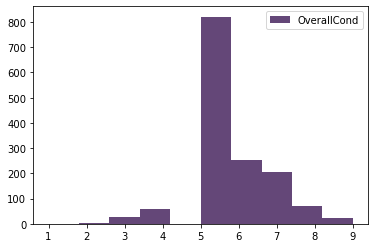

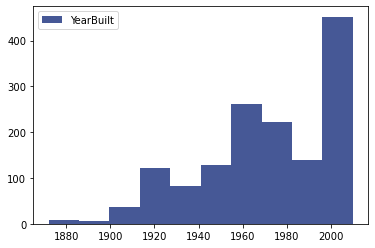

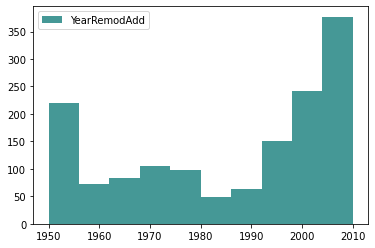

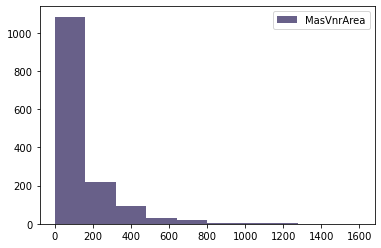

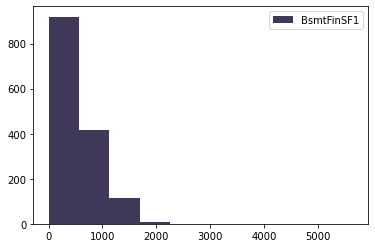

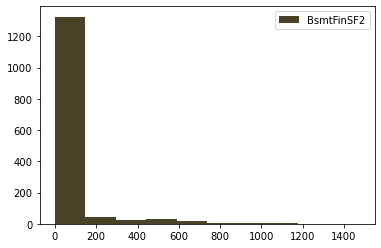

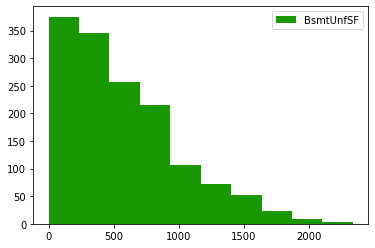

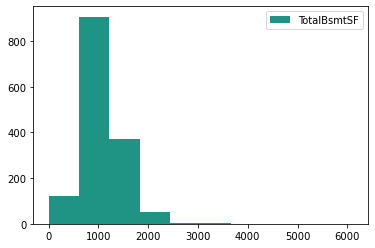

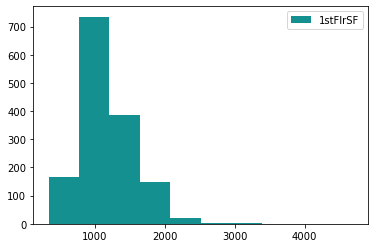

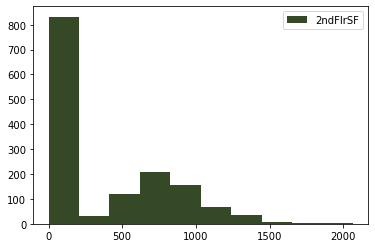

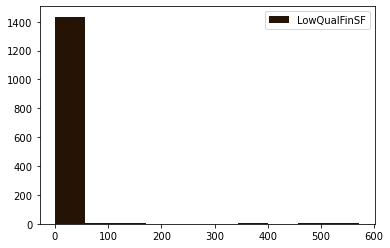

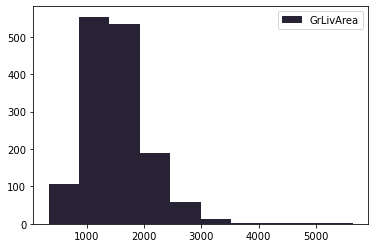

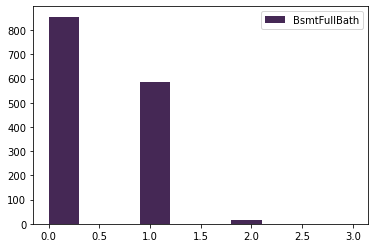

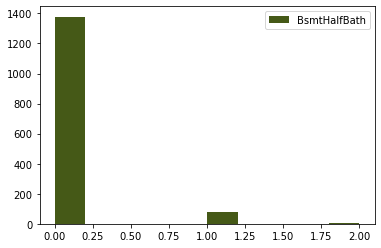

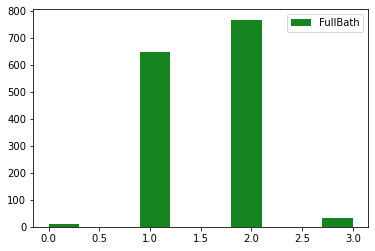

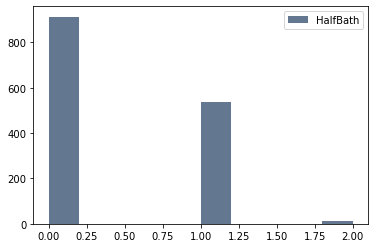

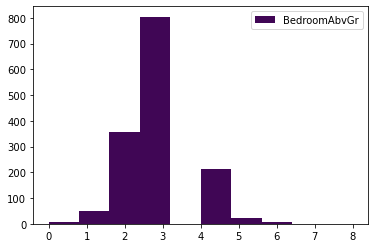

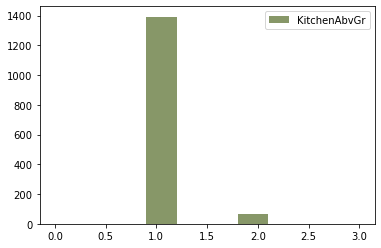

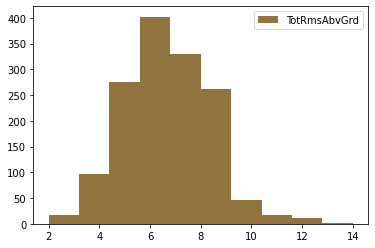

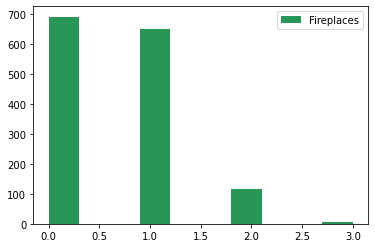

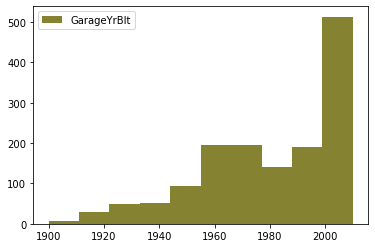

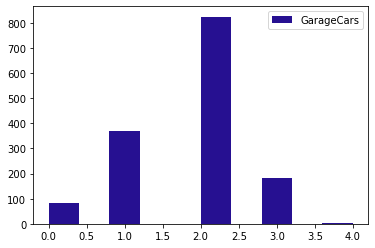

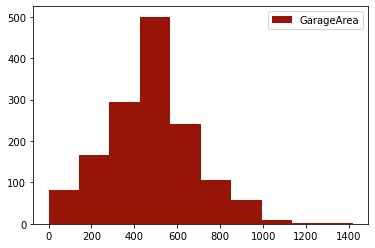

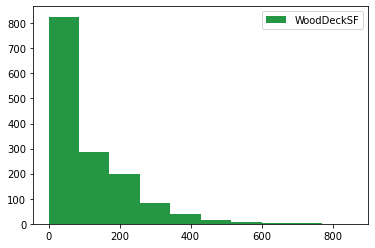

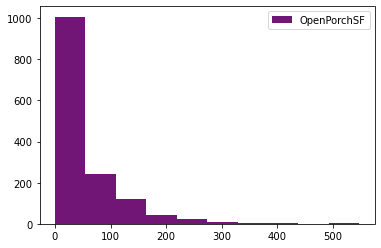

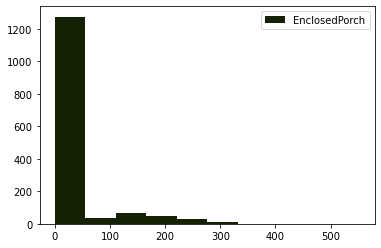

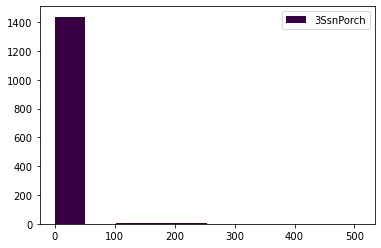

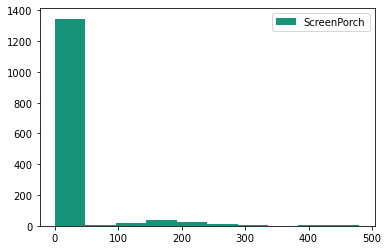

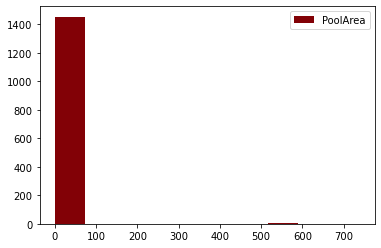

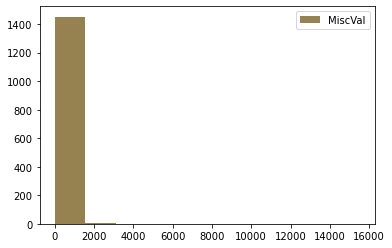

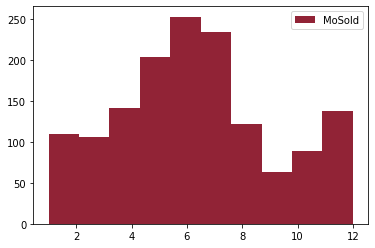

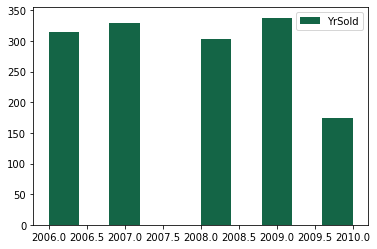

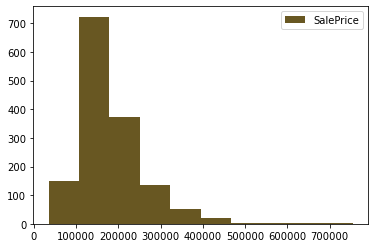

In [43]:
for i in numerical_features:
    colors = "#" + str(np.random.randint(100000,999999))
    plt.hist(df[i], color = colors, label = i)

    plt.legend()
    plt.show()

In [44]:
Y = df[['SalePrice']]
df.drop(columns = ['SalePrice'], inplace = True)

In [45]:
#here i am not going to apply any transformations
#Apply minmaxscalar
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [46]:
scaled_data = scaler.fit_transform(df)

In [47]:
df = pd.DataFrame(scaled_data, columns = df.columns)

In [48]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Pave,Pave,missed,NoSeWa,Y,P,Y
0,0.000000,0.235294,0.835044,0.150685,0.033420,0.000000,0.419312,0.000000,0.0,0.419862,0.544195,0.369855,1.0,0.909438,0.666667,0.500,0.949275,0.883333,0.296683,0.169017,0.747293,0.511367,0.489444,0.122500,0.514176,0.861428,1.000000,0.438305,0.799684,0.385398,1.000000,0.125089,0.746501,0.000000,0.064212,0.140098,1.0,1.000000,1.000000,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.477829,0.500000,1.000000,0.000000,0.055626,0.657548,0.936364,0.722209,0.50,0.386460,0.620046,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.000000,0.564400,0.00000,0.090909,0.50,0.345283,0.422659,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.000685,0.000000,0.835044,0.202055,0.038795,0.000000,0.419312,0.021240,0.0,0.592248,0.081334,0.369855,1.0,0.599322,0.555556,0.875,0.753623,0.433333,0.296683,0.169017,0.410587,0.209361,0.083040,0.000000,0.201722,0.861428,0.360074,0.438305,0.799684,1.000000,0.430948,0.173281,0.746501,0.000000,0.121575,0.206547,1.0,1.000000,1.000000,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.154255,0.333333,1.000000,0.333333,0.365280,0.657548,0.690909,0.722209,0.50,0.324401,0.620046,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.564400,0.00000,0.363636,0.25,0.345283,0.422659,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.001371,0.235294,0.835044,0.160959,0.046507,0.550715,0.419312,0.000000,0.0,0.419862,0.544195,0.369855,1.0,0.909438,0.666667,0.500,0.934783,0.866667,0.296683,0.169017,0.747293,0.511367,0.489444,0.101250,0.514176,0.861428,1.000000,0.438305,0.799684,0.566614,1.000000,0.086109,0.746501,0.000000,0.185788,0.150573,1.0,1.000000,1.000000,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.477829,0.333333,1.000000,0.333333,0.365280,0.657548,0.918182,0.722209,0.50,0.428773,0.620046,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.000000,0.564400,0.00000,0.727273,0.50,0.345283,0.422659,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.002056,0.294118,0.835044,0.133562,0.038561,0.550715,0.419312,0.099866,0.0,0.473339,0.544195,0.369855,1.0,0.909438,0.666667,0.500,0.311594,0.333333,0.296683,0.169017,0.412783,0.263219,0.083040,0.000000,0.201722,0.861428,0.211475,0.158576,1.000000,0.385398,0.430948,0.038271,0.746501,0.000000,0.231164,0.123732,1.0,0.546138,1.000000,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.477829,0.416667,1.000000,0.333333,0.464477,0.203216,0.890909,0.284046,0.75,0.452750,0.620046,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.000000,0.564400,0.00000,0.090909,0.00,0.345283,0.252140,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.002742,0.235294,0.835044,0.215753,0.060576,0.550715,0.419312,0.021240,0.0,1.000000,0.544195,0.369855,1.0,0.909438,0.777778,0.500,0.927536,0.833333,0.296683,0.169017,0.747293,0.511367,0.489444,0.218750,0.514176,0.861428,1.000000,0.438305,0.799684,0.659126,1.000000,0.116052,0.746501,0.000000,0.209760,0.187398,1.0,1.000000,1.000000,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.477829,0.583333,1.000000,0.333333,0.365280,0.657548,0.909091,0.722209,0.75,0.589563,0.620046,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.564400,0.00000,1.000000,0.50,0.345283,0.422659,1.0,0.0,1.0,0.0,1.0,0.

In [49]:
df.drop("Id", axis = 1, inplace = True)

In [56]:
final_df = pd.concat([df, Y], axis = 1)

In [61]:
final_df.to_csv("final_df.csv")